<a href="https://colab.research.google.com/github/competitiveblood/1password-teams-open-source/blob/main/LinearRegressionPBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a ML model for predicting his score if a student studies for 9.25 hrs/ day?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Importing the dataset by reading the url file

In [ ]:
url = "http://bit.ly/w-data"
data_scores = pd.read_csv(url)

In [ ]:
print("First 10 elements of the  dataset")
data_scores.head(10)

First 10 elements of the  dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
print(data_scores.dtypes)
print(data_scores.shape)

Hours     float64
Scores      int64
dtype: object
(25, 2)


Exploratory Analysis

In order for the data to be applied better in the machine learning alogorithmn lets check the data set for missing values and outliers

In [ ]:
data_scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# To check the missing values

In [ ]:
data_scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<Axes: >

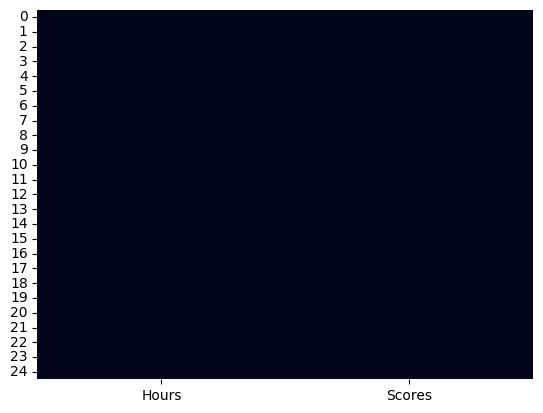

In [ ]:
sns.heatmap(data_scores.isnull(), cbar=False)

As we notice there are no missing values in the dataset

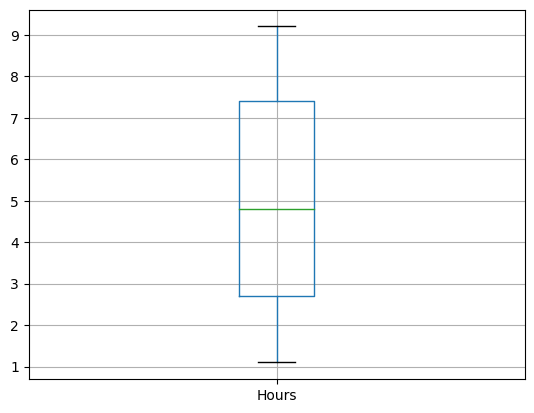

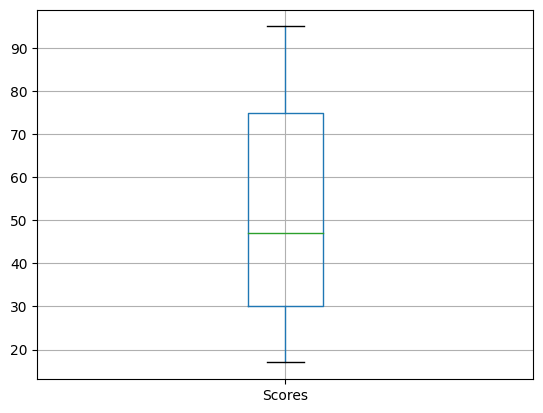

In [ ]:
#There should be no outliers in the data. Check using boxplot
for i in data_scores.columns:
    data_scores.boxplot(column=i)
    plt.show()

Observation: There are no major outliers to be sorted so we can go ahead

#Data visualization

<ipython-input-12-7b8f262aa469>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_scores['Scores'], bins=10)


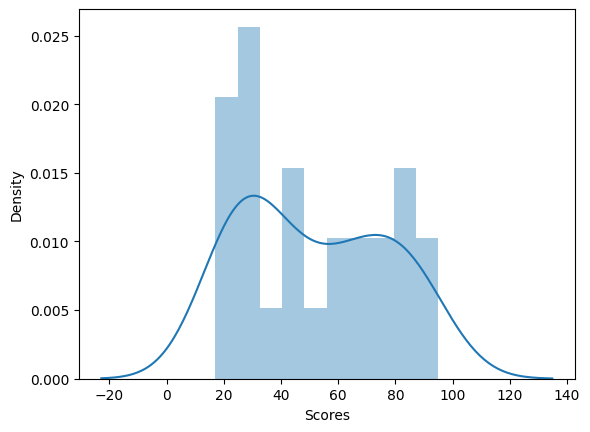

In [ ]:
# Let's visualize the target variable with an Distrubtion Plot
sns.distplot(data_scores['Scores'], bins=10)
plt.show()

We can observe that the Scores are normally distributed with skewness towards the positive side.

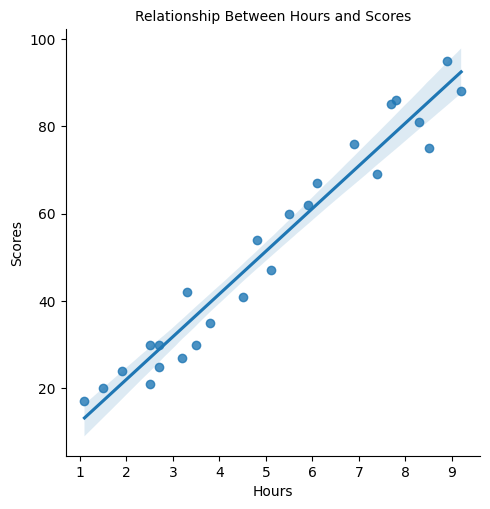

In [ ]:
# Visualizing the dataset columns with the help of a scatter diagram
# scatter plot with regression line
sns.lmplot(data=data_scores, x="Hours" ,y="Scores")
plt.title('Relationship Between Hours and Scores',size=10)
plt.show()

As we see there is a positive relationship between the number of hours and scores.

<Axes: >

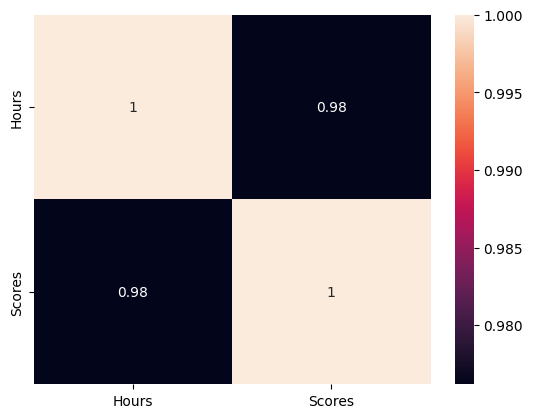

In [ ]:
sns.heatmap(data_scores.corr(),annot=True)

As we observe in this heatmap hours and scores are highly Positively correlated to each other

#Preparing the data for Linear Regression

In [ ]:
X = data_scores.iloc[:, :-1].values
Y = data_scores.iloc[:, 1].values

Splitting the data into training and testing with the help of train_test_split from sklearn module

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)
(17, 1)
(17,)
(8, 1)
(8,)


Fitting the data into the model

In [ ]:
scores_lr = LinearRegression()
scores_lr.fit(X_train, Y_train)

LinearRegression()

Predicting the Scores

In [ ]:
Y_pred = scores_lr.predict(X_test)
Y_pred

array([11.02900268, 25.62801721, 19.3712967 , 95.49472962, 71.51063432,
       27.71359072, 88.19522235, 25.62801721])

Evaluating the Train and Test scores

In [ ]:
print('Training Score : ', scores_lr.score(X_train, Y_train))
print('Test Score : ', scores_lr.score(X_test, Y_test))

Training Score :  0.9496868783142938
Test Score :  0.9420584734434516


Comparing Actual Score and Predicted Score

In [ ]:
output = pd.DataFrame({'Actual Score': Y_test,'Predicted Score': Y_pred, 'Residual':Y_test-Y_pred })
print(output.head())

   Actual Score  Predicted Score  Residual
0            17        11.029003  5.970997
1            21        25.628017 -4.628017
2            24        19.371297  4.628703
3            88        95.494730 -7.494730
4            76        71.510634  4.489366


#Visualize the Predicted and Actual Scores

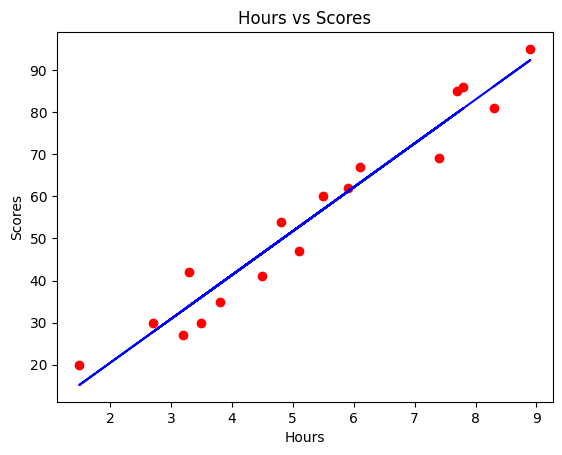

In [ ]:
# Training data Scores vs Predicted Scores
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, scores_lr.predict(X_train), color = 'blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Text(0.5, 1.0, 'Actual Scores vs Predicted Scores')

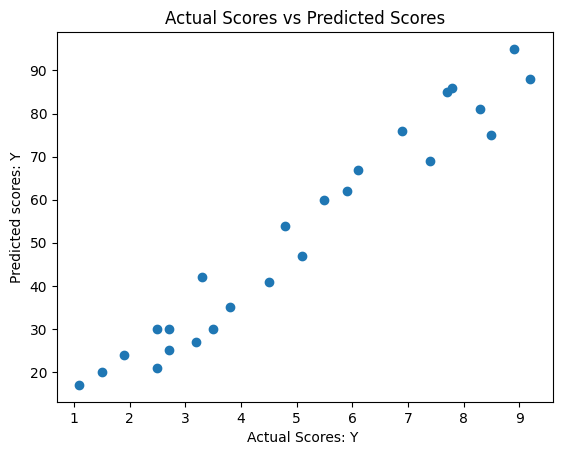

In [ ]:
#Testing data Scores vs Predicted Scores
x=Y_test
y=Y_pred
plt.scatter(X, Y)
plt.xlabel("Actual Scores: Y ")
plt.ylabel("Predicted scores: Y")
plt.title("Actual Scores vs Predicted Scores")


#Evaluating the Model

We will evaluate the model using metrics like : mean_absolute_error, mean_squared_error, R2_score

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(Y_test, Y_pred)))

#Goodness of Fit (R2)
metrics.r2_score(Y_test,Y_pred)

Mean Absolute Error: 5.936576124243745
Root Mean Squared Error: 2.4365090035219947


0.9420584734434516

The linear regression model is doing well because the Mean absolute erroe and the R2 is less

#What will be predicted score if a student study for 9.25 hrs in a day?

In [ ]:
study_hours = 9.25
score_pred = scores_lr.predict([[study_hours]])
print("Number of hours = {}".format(study_hours))
print("Predicted scores = {}".format(score_pred[0]))

Number of hours = 9.25
Predicted scores = 96.01612299632009


Therfore from the above prediction, the predicted score is 96.01612299632009 if a person studies for 9.25 hours

##Conclusion

Therefore, According to the regression model if a student studies for 9.25 hours a day he or she is likely to score 96.01 marks.